In [1]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# Download the data
od.download(
    "https://www.kaggle.com/jsphyg/weather-dataset-rattle-package",
    "../data",
)

Skipping, found downloaded files in "../data/weather-dataset-rattle-package" (use force=True to force download)


In [3]:
os.listdir("../data/weather-dataset-rattle-package")

['weatherAUS.csv']

In [4]:
raw_df = pd.read_csv("../data/weather-dataset-rattle-package/weatherAUS.csv")
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
raw_df.dropna(subset=["RainTomorrow"], inplace=True)

<Axes: title={'center': 'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

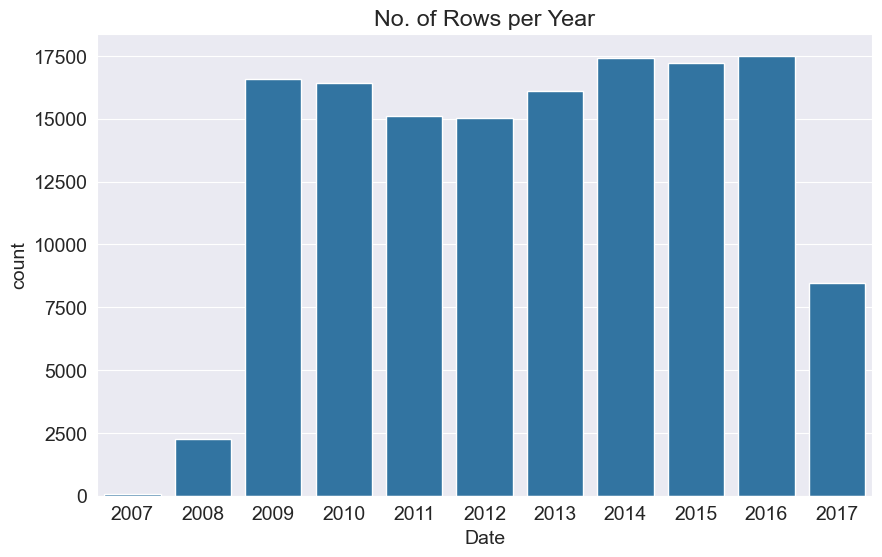

In [7]:
# Prepare the data
plt.title("No. of Rows per Year")
sns.countplot(x=raw_df["Date"].apply(lambda x: x.split("-")[0]).sort_values())

In [8]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]
train_df.shape, val_df.shape, test_df.shape

((98988, 23), (17231, 23), (25974, 23))

In [9]:
# Input and Target Columns
input_cols = list(raw_df.columns)[1:-1]
target_col = "RainTomorrow"

# inputs and targets for training, validation and test sets
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [10]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes("object").columns.tolist()
numeric_cols, categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [11]:
# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean").fit(raw_df[numeric_cols])

In [12]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [13]:
test_inputs[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [14]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [15]:
val_inputs.describe().loc[["min", "max"]]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [16]:
# Encode Categorical Columns
from sklearn.preprocessing import OneHotEncoder

train_df[categorical_cols].fillna("Unknown", inplace=True)
val_df[categorical_cols].fillna("Unknown", inplace=True)
test_df[categorical_cols].fillna("Unknown", inplace=True)

encoder = OneHotEncoder(handle_unknown="ignore").fit(train_inputs[categorical_cols])

/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_13690/1989004603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[categorical_cols].fillna("Unknown", inplace=True)
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_13690/1989004603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[categorical_cols].fillna("Unknown", inplace=True)
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_13690/1989004603.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [17]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [18]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]).toarray()

/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_13690/3240221198.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_13690/3240221198.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
/var/folders/0s/dy02xm3n67g6qdlt8f81tl300000gp/T/ipykernel_13690/3240221198.py:1: PerformanceWarning

In [19]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Training and Visualizing Decision Trees

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.

In Machine Learning, Decision tree is considered to be one of the most popular algorithms. It is a versatile algorithm that can perform both classification and regression tasks, and even multi-output tasks. It is very powerful and works great with complex datasets. We let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria ourselves.

In [20]:
# Training and Visualizing Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

model = DecisionTreeClassifier().fit(X_train, train_targets)

In [21]:
# Evaluate the model
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.7915965411177529)

In [22]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

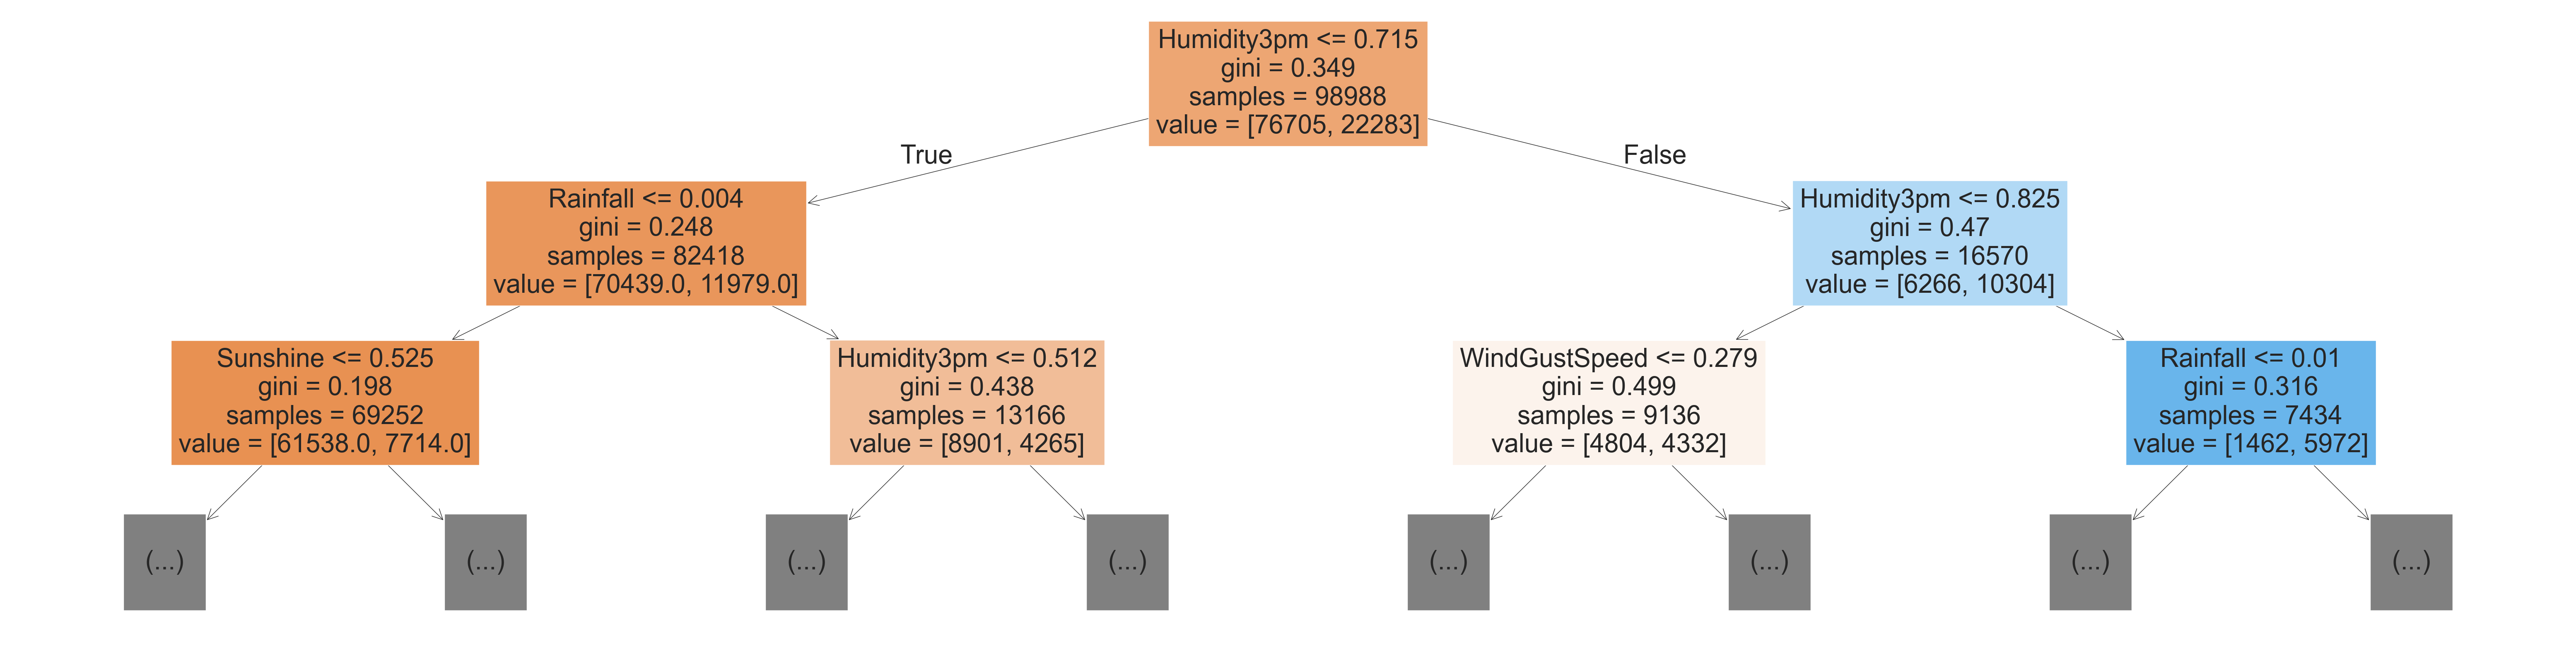

In [23]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

In [24]:
model.tree_.max_depth

48

In [25]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [26]:
model.feature_importances_

array([3.66035437e-02, 3.13277448e-02, 5.81085983e-02, 2.45096296e-02,
       5.00556447e-02, 5.50811848e-02, 2.88368176e-02, 2.99395347e-02,
       3.89886721e-02, 2.60975082e-01, 3.49025087e-02, 6.29457419e-02,
       1.32637560e-02, 1.81235855e-02, 3.40563841e-02, 2.91360799e-02,
       2.36559538e-03, 1.99319366e-03, 1.43258901e-03, 5.70669924e-04,
       1.56269249e-03, 1.13971129e-03, 6.96942450e-04, 1.87799185e-03,
       1.10173952e-03, 1.50389381e-03, 7.82087123e-04, 2.19994252e-03,
       1.78319452e-03, 1.18503666e-04, 1.17345232e-03, 1.49467661e-03,
       4.35828780e-04, 8.07323825e-04, 1.67115516e-03, 8.31803187e-04,
       9.01123498e-04, 7.78952659e-04, 1.68040874e-03, 1.94155414e-03,
       3.16924543e-04, 5.47271235e-04, 1.73810407e-03, 1.65430512e-03,
       1.33095724e-03, 1.01732063e-03, 8.03032607e-04, 1.53392028e-03,
       1.35881641e-03, 1.88017889e-03, 8.46937815e-04, 1.36995385e-03,
       1.06753796e-03, 1.27041279e-03, 1.34273759e-03, 3.39108141e-04,
      

In [27]:
# Turn this into a df and visualize the most important features
importance_df = pd.DataFrame(
    {"feature": X_train.columns, "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

importance_df.head(10)

,feature,importance
9,Humidity3pm,0.260975
11,Pressure3pm,0.062946
2,Rainfall,0.058109
5,WindGustSpeed,0.055081
4,Sunshine,0.050056
8,Humidity9am,0.038989
0,MinTemp,0.036604
10,Pressure9am,0.034903
14,Temp9am,0.034056
1,MaxTemp,0.031328


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

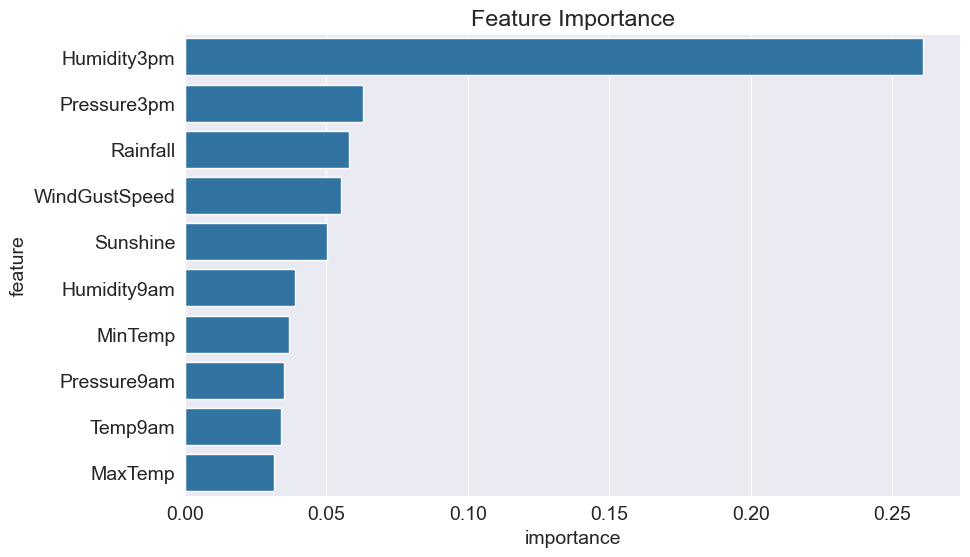

In [28]:
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

## Hyperparameter Tuning and Overfitting

The `DecisionTreeClassifier` class in the `sklearn.tree` module provides parameters such as `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, etc. to prevent a tree from overfitting. These parameters are called hyperparameters, and the process of searching for the ideal hyperparameters is known as hyperparameter tuning.

The process of reducing overfitting is known as regularization. Regularization can be achieved by setting the hyperparameters of the decision tree classifier.

In [29]:
model = DecisionTreeClassifier(max_depth=7).fit(X_train, train_targets)

In [30]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8466884874934335, 0.8453949277465034)

In [31]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.7, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Humidity3pm <= 0.512\ngini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.3, 'WindGustSpeed <= 0.318\ngini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.

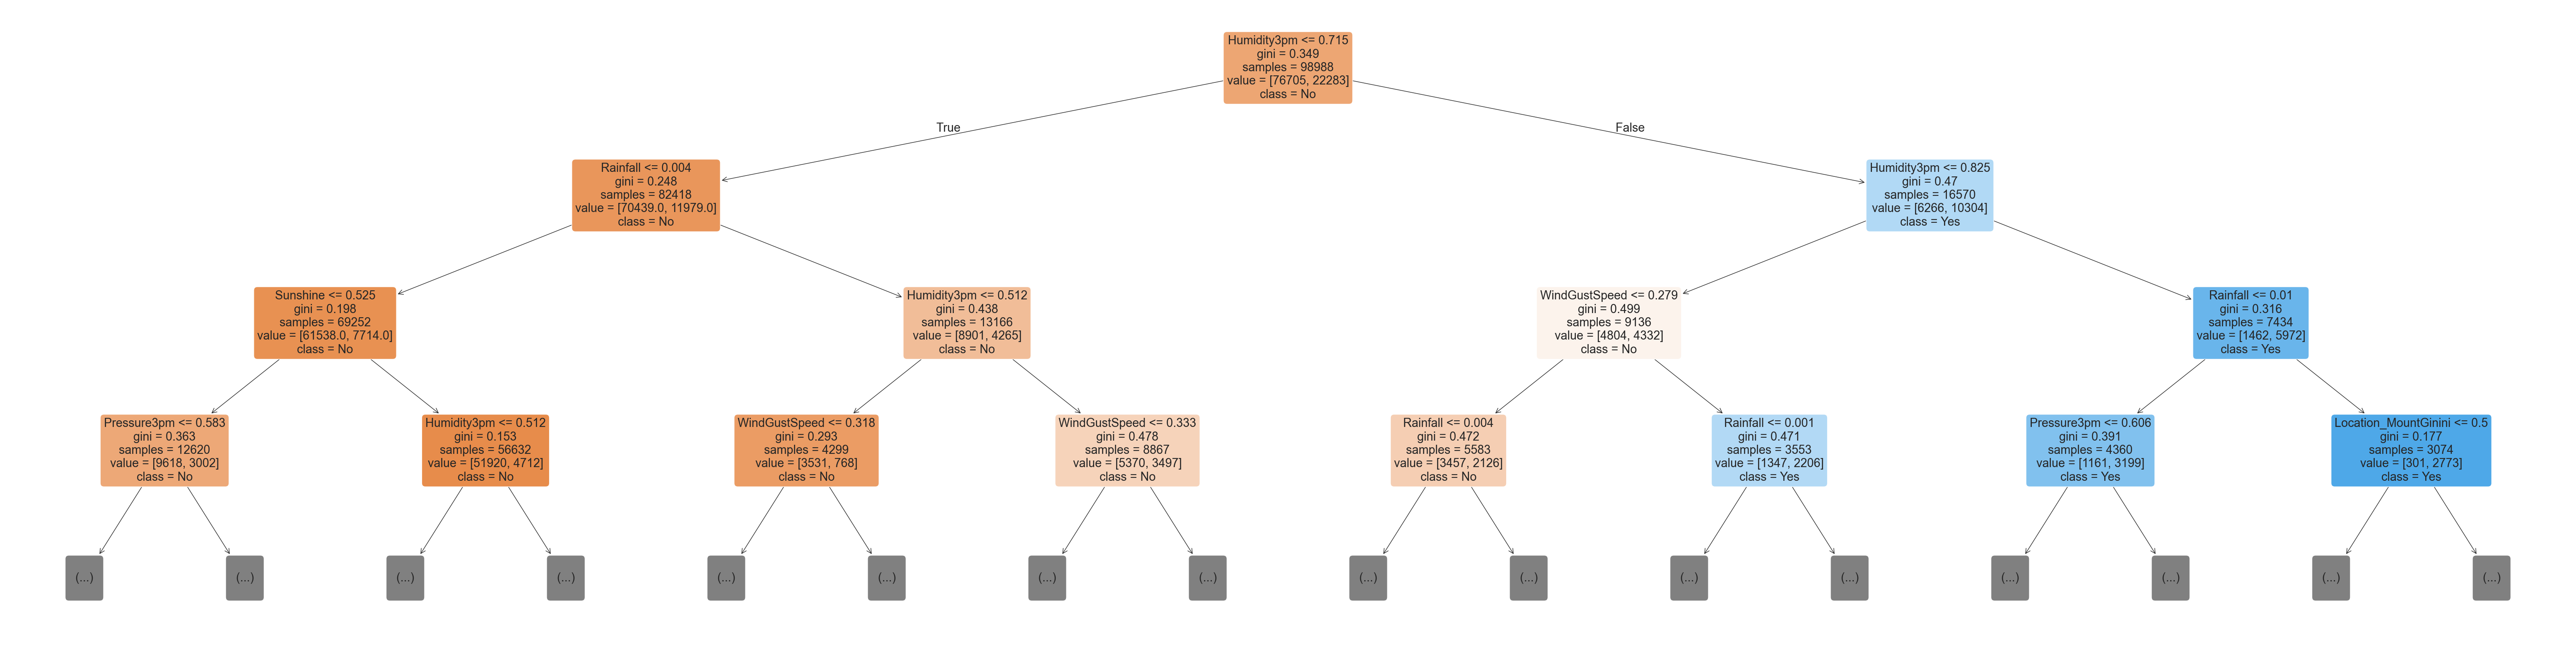

In [32]:
plt.figure(figsize=(80, 20))
plot_tree(
    model,
    feature_names=X_train.columns,
    max_depth=3,
    filled=True,
    rounded=True,
    class_names=model.classes_,
)

In [33]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md).fit(X_train, train_targets)
    train_err = 1 - model.score(X_train, train_targets)
    val_err = 1 - model.score(X_val, val_targets)
    return {"max_depth": md, "train_error": train_err, "val_error": val_err}

In [34]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])
errors_df

,max_depth,train_error,val_error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157681
8,9,0.140916,0.156288
9,10,0.132966,0.158087


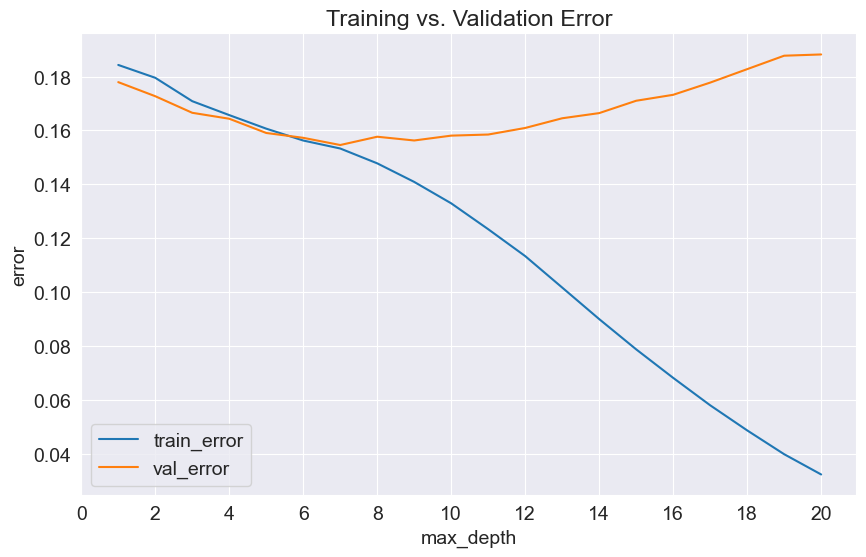

In [35]:
plt.figure()
plt.plot(errors_df.max_depth, errors_df.train_error, label="train_error")
plt.plot(errors_df.max_depth, errors_df.val_error, label="val_error")
plt.xlabel("max_depth")
plt.ylabel("error")
plt.title("Training vs. Validation Error")
plt.xticks(range(0, 21, 2))
plt.legend()

In [36]:
# max_leaf_nodes limits the number of leaf nodes and allows branches to have varying depths
model = DecisionTreeClassifier(max_leaf_nodes=128).fit(X_train, train_targets)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128)

In [37]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8480421869317493, 0.8442342290058615)

In [38]:
model.tree_.max_depth

12

In [39]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1).fit(X_train, train_targets)

In [41]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999494888269285, 0.8563054959085369)

In [42]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94, 0.06],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [43]:
len(model.estimators_)

100

In [44]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1584730617)

[Text(0.5, 0.875, 'RainToday_No <= 0.5\ngini = 0.35\nsamples = 62534\nvalue = [76568, 22420]'),
 Text(0.25, 0.625, 'Pressure3pm <= 0.567\ngini = 0.498\nsamples = 14564\nvalue = [12196, 10904]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Location_Wollongong <= 0.5\ngini = 0.483\nsamples = 5643\nvalue = [3626.0, 5260.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Sunshine <= 0.528\ngini = 0.479\nsamples = 8921\nvalue = [8570, 5644]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindGustSpeed <= 0.364\ngini = 0.257\nsamples = 47970\nvalue = [64372.0, 11516.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Pressure3pm <= 0.537\ngini = 0.227\nsamples = 41954\nvalue = [57731, 8672]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'WindGustDir_ESE <= 0.5\ngini = 0.42\nsamples = 6016\nvalue = [6641, 2844]'),
 Text(0

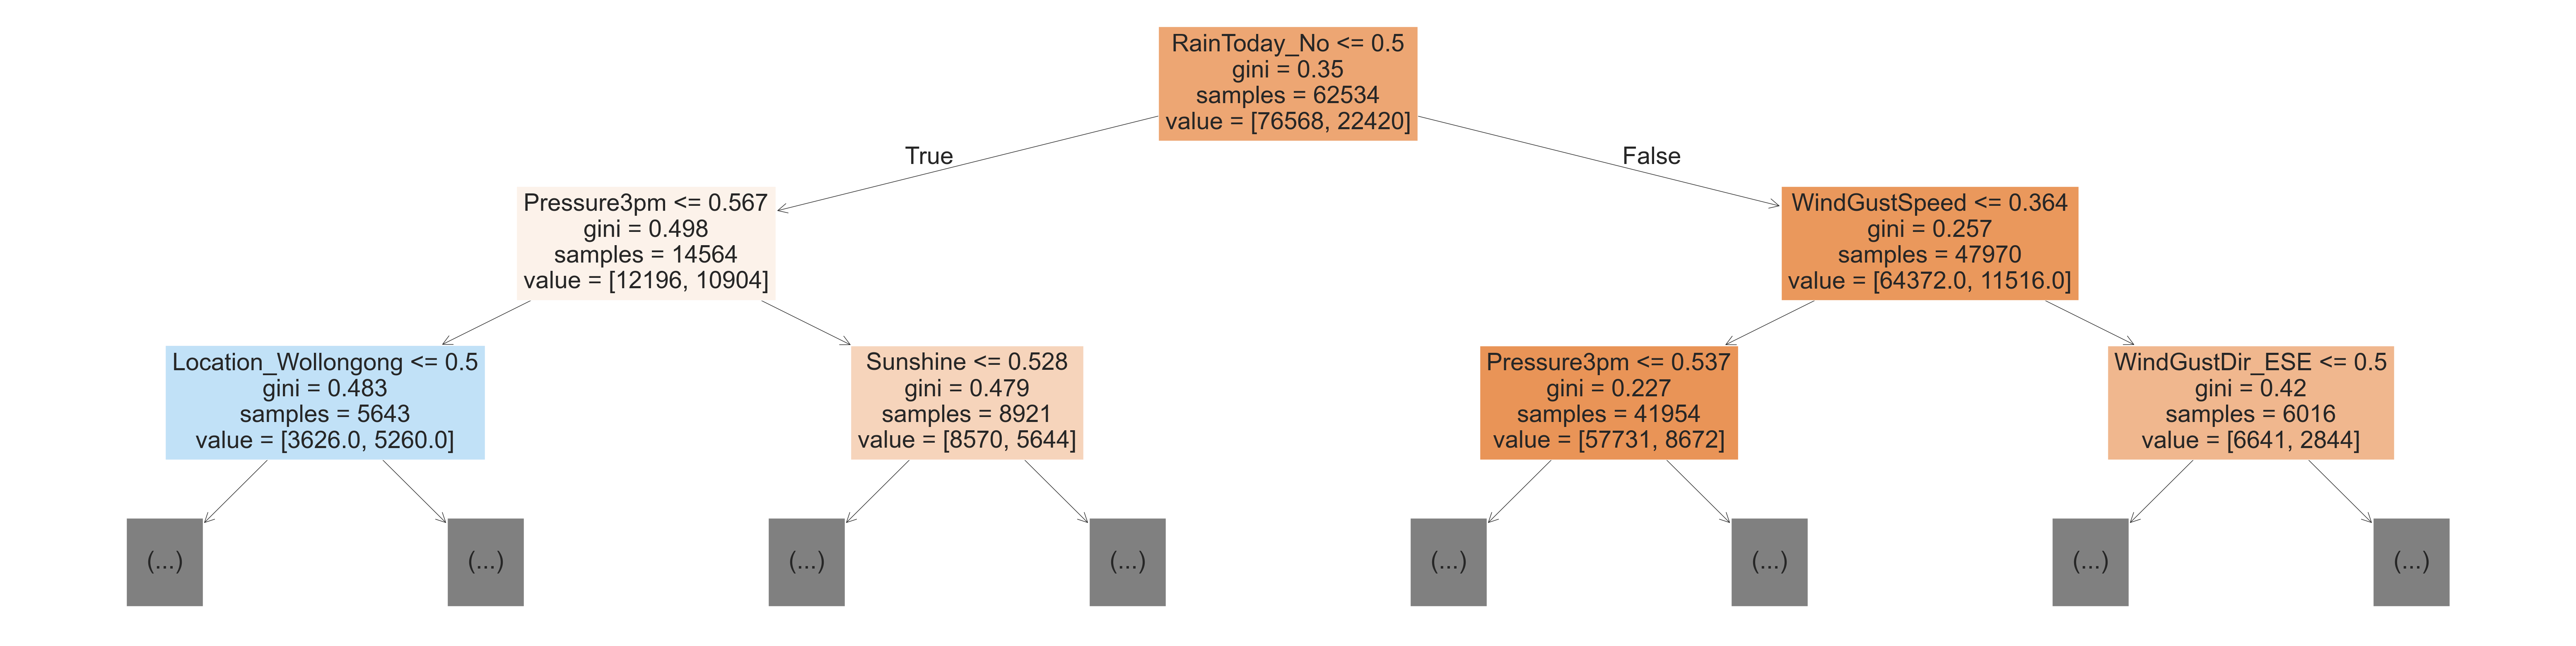

In [45]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[0], feature_names=X_train.columns, max_depth=2, filled=True)

In [46]:
importance_df = pd.DataFrame(
    {"feature": X_train.columns, "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

importance_df.head(10)

,feature,importance
9,Humidity3pm,0.131746
4,Sunshine,0.056931
11,Pressure3pm,0.054130
8,Humidity9am,0.048030
5,WindGustSpeed,0.047600
10,Pressure9am,0.047216
2,Rainfall,0.045609
15,Temp3pm,0.044428
0,MinTemp,0.042201
1,MaxTemp,0.041959


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

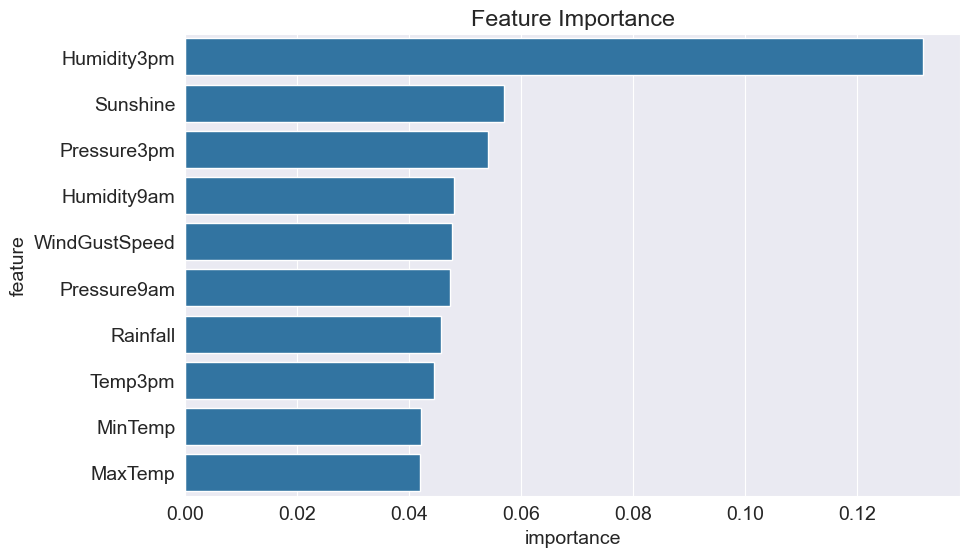

In [47]:
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [48]:
base_model = RandomForestClassifier(n_jobs=-1).fit(X_train, train_targets)

base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999797955307714, 0.8558992513493123)

In [49]:
# n_estimators: number of trees in the forest (more trees -> higher accuracy because higher randomness and less overfitting, higher variance)
model = RandomForestClassifier(n_estimators=500, n_jobs=-1).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8570599500899542)

In [50]:
def test_params(**params):
    model = RandomForestClassifier(n_jobs=-1, **params).fit(X_train, train_targets)
    train_acc = model.score(X_train, train_targets)
    val_acc = model.score(X_val, val_targets)
    return train_acc, val_acc

In [51]:
test_params(n_estimators=100, max_depth=26)

(0.9813411726673941, 0.8564215657826011)

In [52]:
# max_features: number of features to consider when looking for the best split
test_params(max_features="log2")

(0.9999595910615429, 0.8556090766641519)

In [53]:
test_params(max_features=3)

(0.9999797955307714, 0.8534037490569323)

In [54]:
test_params(max_features=6)

(0.9999696932961571, 0.8556090766641519)

In [55]:
# min_samples_split: minimum number of samples required to split an internal node (default=2)
# min_samples_leaf: minimum number of samples required to be at a leaf node (default=1)
test_params(min_samples_split=5, min_samples_leaf=2)

(0.9570655028892391, 0.8565376356566653)

In [56]:
# min_impurity_decrease: a node will be split if this split induces a decrease of the impurity greater than or equal to this value (ginis impurity). Often used from 1e-7 to 1e-3.
test_params(min_impurity_decrease=1e-6)

(0.9885339637127732, 0.8565376356566653)

In [57]:
# bootstrap: whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
# max_samples: if bootstrap is True, the number of samples to draw from X to train each base estimator. X is the training data. If None, then draw X.shape[0] samples. If int, then draw max_samples samples. If float, then draw max_samples * X.shape[0] samples.
test_params(bootstrap=False)

(0.9999797955307714, 0.8572920898380825)

In [58]:
test_params(max_samples=0.9)

(0.999828262011557, 0.8547385526086704)

In [59]:
# class_weight: weights associated with classes in the form {class_label: weight}
train_targets.value_counts() / len(train_targets)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [60]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [61]:
test_params(class_weight="balanced")

(0.9999494888269285, 0.8563054959085369)

In [62]:
test_params(class_weight={"No": 1, "Yes": 2})

(0.9999797955307714, 0.8564796007196332)

In [63]:
model = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    n_estimators=500,
    max_features=7,
    max_depth=30,
    class_weight={"No": 1, "Yes": 1.5},
).fit(X_train, train_targets)

In [64]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920293368893199, 0.8564215657826011)

In [65]:
import joblib

aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}
joblib.dump(aussie_rain, "../models/aussie_rain2.joblib")

['../models/aussie_rain2.joblib']

In [66]:
aussie_rain2 = joblib.load("../models/aussie_rain2.joblib")

test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8451913451913452